<a href="https://colab.research.google.com/github/Carumo/TrabajoFinal_MLDL/blob/main/Trabajo_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



<h1 align=center><font size = 5>Trabajo_final - Boston Vivienda</font></h1>

---

## Tabla de Contenidos

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>
    
1. <a href="#item31">Introducción</a>  
2. <a href="#item32">Problema</a>  
3. <a href="#item33">Importar Librerías</a>  
4. <a href="#item34">Levantamiento y Análisis de Data</a>
5. <a href="#item34">Tratamiento de variables</a>  
6. <a href="#item34">Regresión Logística</a>  
7. <a href="#item34">Elastic Net</a>  

</font>
</div>

## Introducción


Este notebook ha sido preparado como trabajo final de la Especialización de Machine Learning dictado en DMC.

## Problema


Quieres ser el mejor agente inmobiliario que existe. Para competir con otros agentes de tu zona, decides utilizar el aprendizaje automático. Vas a utilizar varias herramientas de análisis estadístico para construir el mejor modelo para predecir el valor de una casa determinada. Su tarea es encontrar el mejor precio al que su cliente pueda vender su casa. La mejor conjetura de un modelo es la que mejor generaliza los datos.

## Importar Librerías

In [88]:
# Scikit-Learn
import sklearn
from sklearn.feature_selection import RFE
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import svm
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler

# Imports comunes
import pandas as pd
import numpy as np


# Configuración de tamaño de gráficos matplotlib
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Cargar seaborn
import seaborn as sns
sns.set(style="whitegrid", color_codes = True)
sns.set(rc={'figure.figsize':(8,5)})

# Cargar librerías de estadística
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import scipy
from scipy import stats
from scipy.stats import mstats, kruskal
import tensorflow as tf
from tensorflow import keras
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense

## Levantamiento y Análisis de Data

In [53]:
# Cargar Data
data = pd.read_csv("bostonvivienda.csv")
data.head()

,crim,zn,indus,nox,rm,edad,dis,rad,impuesto,ptratio,negro,lstat,medv
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [54]:
data.describe()

,crim,zn,indus,nox,rm,edad,dis,rad,impuesto,ptratio,negro,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000



<b>Descripción de datos</b>

El data frame de BostonVivienda tiene 506 filas, 12 variables independientes (numéricas / categóricas) y 1 variable tarjet definida por la columna MEDV. .

<b>Las variables predictoras o independietes están conformadas por:</b>

---

* <b>crim : </b>  Tasa de criminalidad per cápita por ciudad.
* <b>zn : </b>  Proporción de terrenos residenciales zonificados para lotes de más de 25,000 pies cuadrados.
* <b>indus : </b>  Proporción de acres de negocios empresariales por ciudad.
* <b>nox : </b>  Concentración de óxidos nítricos (partes por 10 millones).
* <b>rm : </b>  Promedio de habitaciones por vivienda.

* <b>age : </b>  Proporción de unidades ocupadas por sus propietarios construidas antes de 1940.

* <b>dis : </b>  distancias ponderadas a cinco centros de empleo de Boston.
* <b>rad : </b>  Índice de accesibilidad a autopistas radiales.
* <b>tax : </b>  Tasa de impuesto a la propiedad de valor total por $10,000.
* <b>ptratio : </b>  Ratio de alumnos por profesor por ciudad.
* <b>afro : </b>  1000(Bk - 0.63)^2 donde Bk es la proporción de afromamericanos por ciudad.
* <b>lstat : </b>  % de menor nivel de la población.
* <b>medv : </b>  Valor medio de las viviendas ocupadas por sus propietarios en miles USD.



---

In [55]:
# Validando la presencia de datos missing
data.isnull().sum()

crim        0
zn          0
indus       0
nox         0
rm          0
edad        0
dis         0
rad         0
impuesto    0
ptratio     0
negro       0
lstat       0
medv        0
dtype: int64

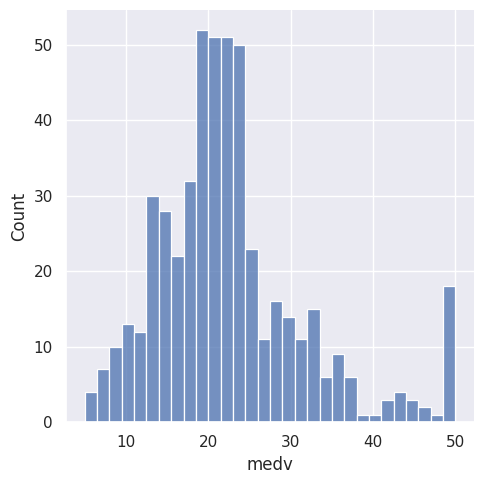

In [56]:
sns.displot(data["medv"], bins=30)
plt.show()

[]

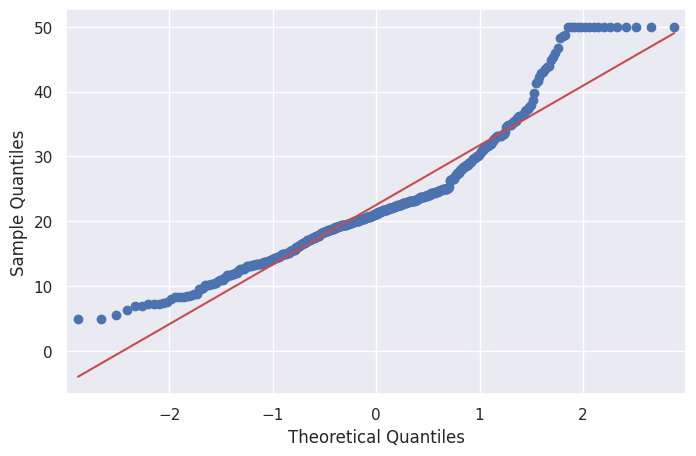

In [57]:
#Plot QQPlot to assess if the target (price) variable came from some theoretical distribution such as a Normal or exponential
pr = sm.qqplot(data["medv"], line='s')

dt = pr.findobj(lambda x: hasattr(x, 'get_color') and x.get_color() == 'b')

[d.set_alpha(0.3) for d in dt]

La variable target parciera ajustarse a una districión Normal con algunos datos atípicos hacia la cola derecha.

In [60]:
#Buscando asimetría de las variables
print(data.skew())

crim        5.223149
zn          2.225666
indus       0.295022
nox         0.729308
rm          0.403612
edad       -0.598963
dis         1.011781
rad         1.004815
impuesto    0.669956
ptratio    -0.802325
negro      -2.890374
lstat       0.906460
medv        1.108098
dtype: float64


In [61]:
#Revisando la concentración de la distribución de la data mediante la kurtosis
print(data.kurt())

crim        37.130509
zn           4.031510
indus       -1.233540
nox         -0.064667
rm           1.891500
edad        -0.967716
dis          0.487941
rad         -0.867232
impuesto    -1.142408
ptratio     -0.285091
negro        7.226818
lstat        0.493240
medv         1.495197
dtype: float64


Se observan que las variables "crim", "afro" y "zn" tienen menos concentración hacia la mediana; y por ende, sus curvas de distribuciòn son más achatadas en el centro, teniendo mayor presencia hacia las colas. Esto denota la presencia de datos atípicos.

Por otro lado, las variables "indus" y "rm" son casi simétricas.


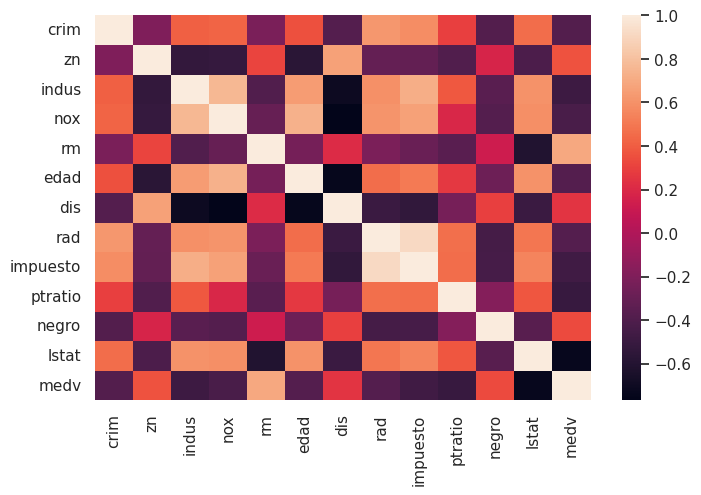

In [66]:
# Buscando correlaciones altas entre todas las variables
corr = data.corr()
sns.heatmap(corr)
plt.show()

A partir de la correlación de Pearson, las variables "lstat" y "rm" parecen tener una alta correlación con la variable target "medv".

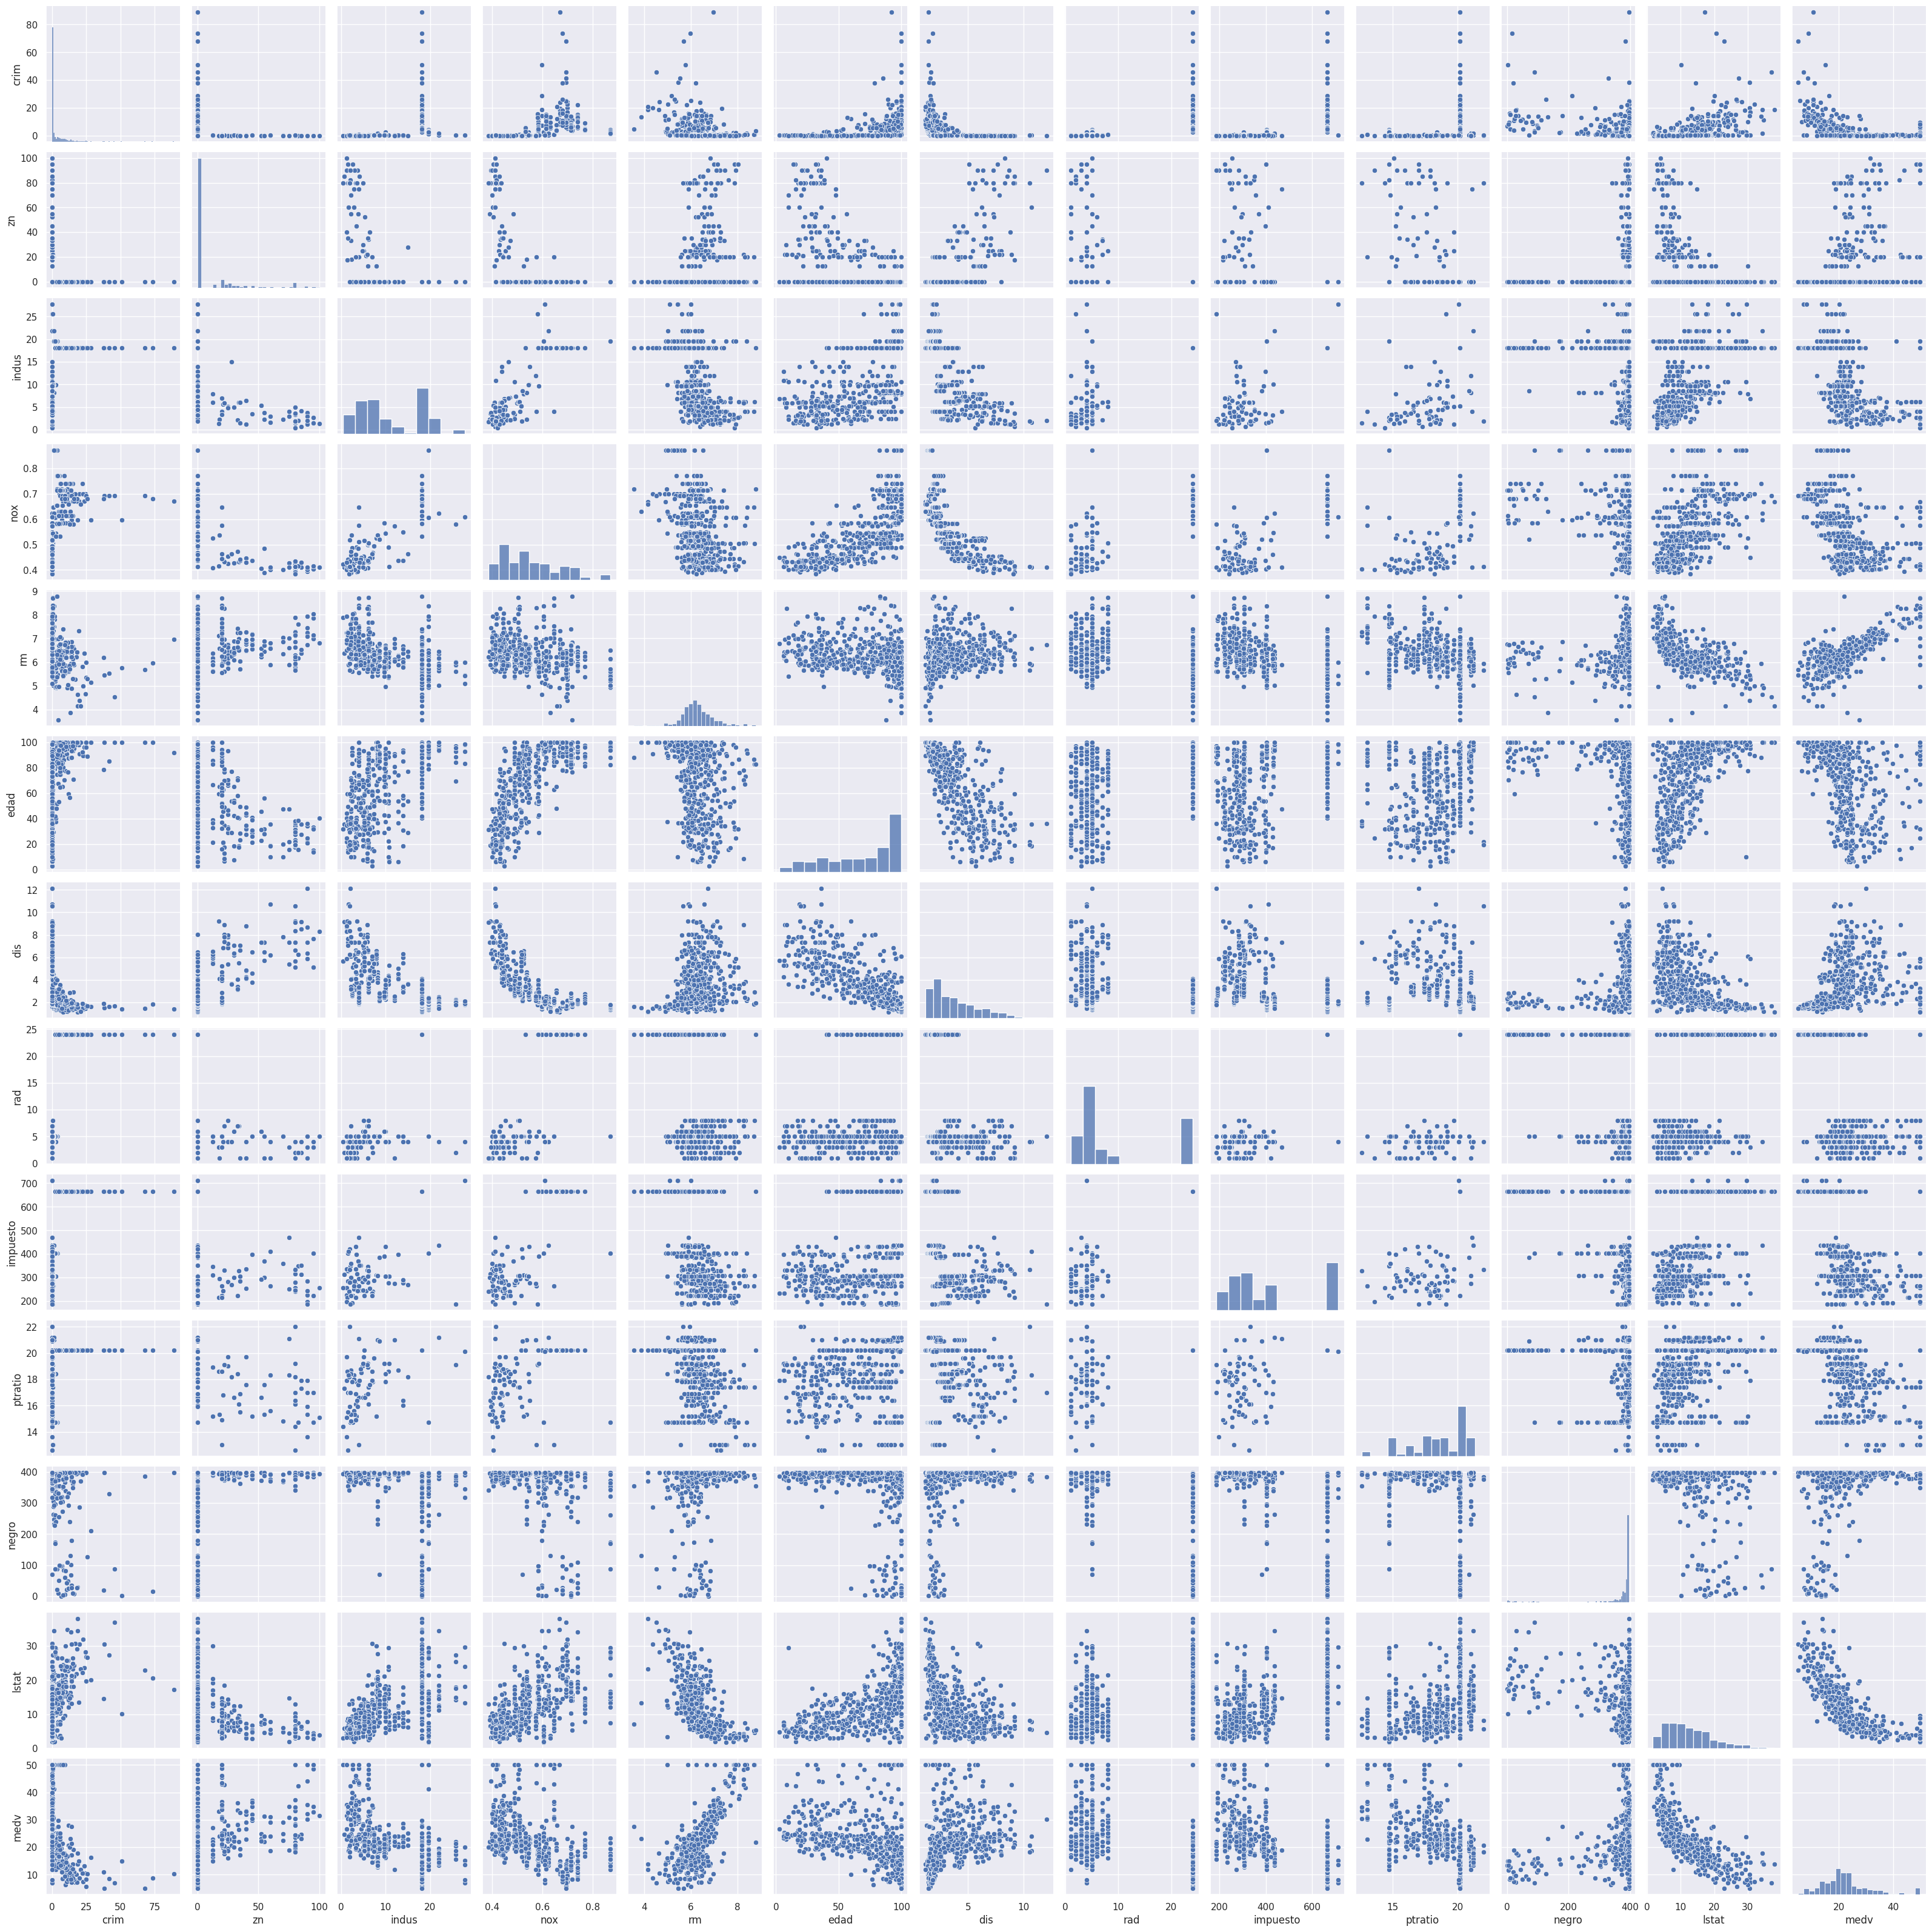

In [62]:
sns.pairplot(data)

## 3. Muestreo Train/Test

In [67]:
# Variables independientes
X = data.iloc[:, :12]

# Variable target
Y = data["medv"]

In [75]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.30, random_state=123)


In [76]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((354, 12), (152, 12), (354,), (152,))

## Modelamiento

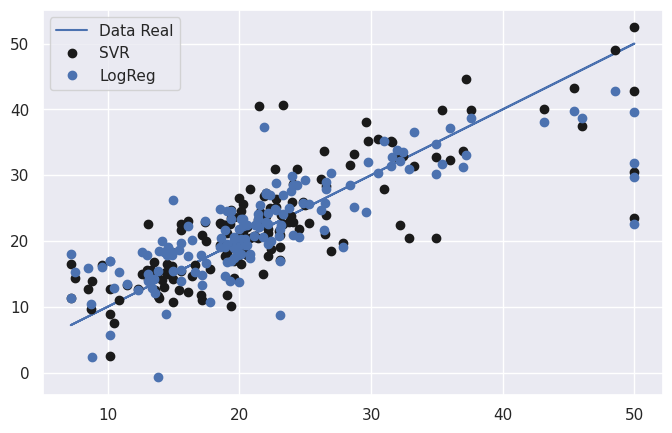

In [77]:
#Check the classifiers - SVR (Support Vector Regression) and Linear Regression

svr = SVR(kernel='rbf',  C=100.0, epsilon=0.2, gamma=0.001)
log = LinearRegression()

# Train both models
svr.fit(x_train, y_train)
log.fit(x_train, y_train)

# Predict test labels from both models
predLog = log.predict(x_test)
predSvr = svr.predict(x_test)

# Show it on the plot
plt.plot(y_test, y_test, label='Data Real')
plt.plot(y_test, predSvr, 'ko', label='SVR')
plt.plot(y_test, predLog, 'bo', label='LogReg')
plt.legend()
plt.show()

In [78]:
confidence = svr.score(x_test, y_test)
print(confidence)

0.6290498398132867


In [79]:
confidence = log.score(x_test, y_test)
print(confidence)

0.6453793180598797


El gráfico y el resultado de la precisión muestran que el mejor modelo para aplicar en este caso es la regresión lineal.

In [81]:
# Comparación del precio estimado por el modelo de regresión lineal vs. el precio real observado.

linear_model = LinearRegression()

linear_model.fit(x_train, y_train)

precio_estimado = linear_model.predict(x_test)

predicción_dataframe = pd.DataFrame(
    {"Precio_Estimado": precio_estimado, "Precio_Observado": y_test})
print(predicción_dataframe)

     Precio_Estimado  Precio_Observado
410        15.455637              15.0
85         27.870751              26.6
280        39.755644              45.4
422        17.955442              20.8
199        30.186285              34.9
..               ...               ...
310        17.704378              16.1
91         27.073947              22.0
151        18.911619              19.6
426        16.914894              10.2
472        22.487236              23.2

[152 rows x 2 columns]


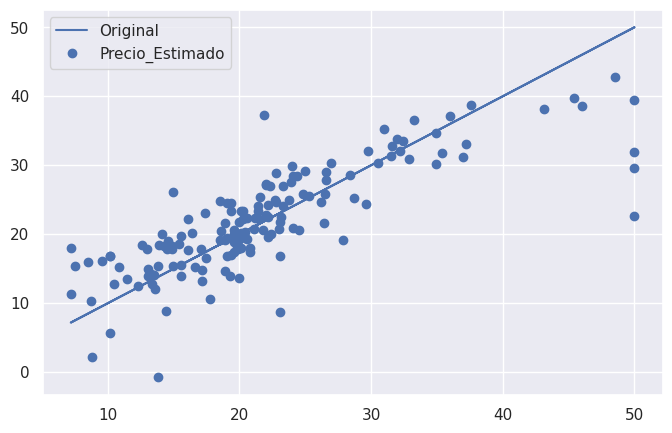

In [82]:
plt.plot(y_test, y_test, label='Original')
plt.plot(y_test, precio_estimado, 'bo', label='Precio_Estimado')
plt.legend()
plt.show()

In [93]:
#Set up the architecture - first and second layer as a dense (fully-connected) layers with 64 neurons, ReLU activation and the input shape is 13 and the last layer layer is a dense layer with 1 neuron
model = Sequential([Dense(64, kernel_initializer='normal', activation='relu', input_shape=(12,)),Dense(64, kernel_initializer='normal',activation='relu'), Dense(1, kernel_initializer='normal'),])

#Create model
model.compile(optimizer='rmsprop',loss='mse',metrics=['accuracy']) #Compile model
model.fit(x_train, y_train, epochs=150, batch_size=10, verbose=0) #Fit the model

In [96]:
predicciones = model.predict(x_test)
predicciones

5/5 [==============================] - 0s 4ms/step


array([[17.306978 ],
       [26.81099  ],
       [45.98306  ],
       [19.073345 ],
       [30.18626  ],
       [44.28544  ],
       [31.427647 ],
       [12.9603615],
       [17.613102 ],
       [26.63836  ],
       [26.561989 ],
       [21.361572 ],
       [13.845587 ],
       [33.982426 ],
       [19.859207 ],
       [21.073858 ],
       [20.942482 ],
       [40.180954 ],
       [19.68235  ],
       [16.285126 ],
       [17.370224 ],
       [28.654936 ],
       [40.945545 ],
       [44.206177 ],
       [52.289024 ],
       [26.04638  ],
       [17.831932 ],
       [22.6143   ],
       [20.852161 ],
       [19.347406 ],
       [24.392023 ],
       [40.135975 ],
       [13.145529 ],
       [20.2698   ],
       [20.870934 ],
       [30.831276 ],
       [26.232971 ],
       [16.82242  ],
       [16.294172 ],
       [47.32427  ],
       [29.618626 ],
       [18.905224 ],
       [24.147928 ],
       [57.06352  ],
       [16.51515  ],
       [24.65379  ],
       [22.374405 ],
       [24.12

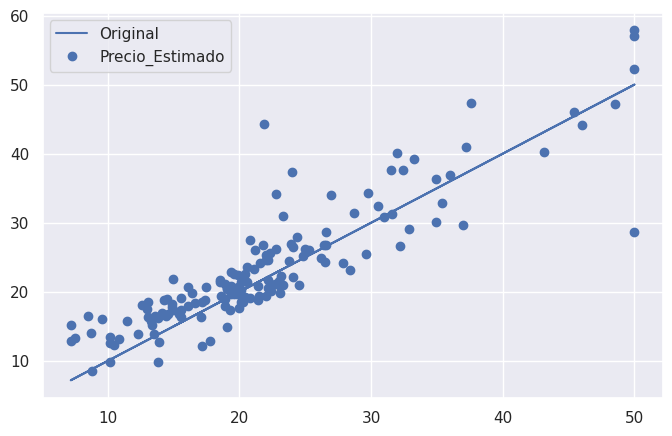

In [97]:
#Evaluate the model on the test
plt.plot(y_test, y_test, label='Original')
plt.plot(y_test, predicciones, 'bo', label='Precio_Estimado')
plt.legend()
plt.show()

In [98]:
#Regression error metrics (MSE and MAE) linear regression model and keras

#Linear regression model
mse = mean_squared_error(precio_estimado, y_test) #the average squared difference between the predicted values and what is predicted
mae = mean_absolute_error(precio_estimado, y_test) #how big of an error we can expect from the forecast on average
print(mse, mae)

28.663312988798406 3.703006359881323


In [100]:
#Keras
mse = mean_squared_error(predicciones, y_test)
mae = mean_absolute_error(predicciones, y_test)
print(mse, mae)

20.24575069216228 3.2090894448129754


## 6. Tratamiento de variables numéricas




In [ ]:
# Tratamiento de outliers por percentiles

univariate['li_per'] = univariate['P1']
univariate['ls_per'] = univariate['P99']


In [ ]:
# Tratamiento de outliers por Z-score

def ric(dataframe, univariate, featuresToTreat):
  for col in featuresToTreat:
    desc = univariate.loc[univariate.feature == col]
    dataframe[col + '_per'] = dataframe[col].apply(lambda x: desc.ls_per.values[0] if x > desc.ls_per.values[0]
                                                            else desc.li_per.values[0] if x < desc.li_per.values[0]
                                                            else x)
  return dataframe


In [ ]:
train_I = ric(train, univariate, univariate.feature.tolist())
test_I  = ric(test,  univariate, univariate.feature.tolist())

## 8. Estandarización

In [ ]:

#Estandarización de datos
variables = ['Age_per','Fare_per','SibSp_per','Parch_per', 'Pclass_coded', 'Sex_coded', 'Embarked_coded']

train_II = (train_I[variables] - train_I[variables].mean())/train_I[variables].std()
test_II  = (test_I[variables] - train_I[variables].mean())/train_I[variables].std()


## 9. Logistic Regression

In [ ]:
#Variables para el modelo

numFeatures = ['Age_per','Fare_per','SibSp_per','Parch_per']
catFeatures = ['Pclass_coded', 'Sex_coded', 'Embarked_coded']

X_train = train_II[numFeatures + catFeatures]
X_test  = test_II[numFeatures + catFeatures]

y_train = train.Survived
y_test  = test.Survived



In [ ]:
import statsmodels.api as sm

# Fit and summarize OLS model
mod = sm.Logit(y_train, sm.add_constant(X_train))
res = mod.fit()

print(res.summary())


Optimization terminated successfully.
         Current function value: 0.447594
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  623
Model:                          Logit   Df Residuals:                      615
Method:                           MLE   Df Model:                            7
Date:                Sat, 18 Mar 2023   Pseudo R-squ.:                  0.3314
Time:                        02:33:05   Log-Likelihood:                -278.85
converged:                       True   LL-Null:                       -417.09
Covariance Type:            nonrobust   LLR p-value:                 6.350e-56
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.6045      0.108     -5.586      0.000      -0.817      -0.392
Age_per          

In [ ]:
import statsmodels.api as sm
# Método Backward

mod_features = list(set(numFeatures + catFeatures) - set(['Fare_per', 'Parch_per', 'Embarked_coded']))

# Fit and summarize OLS model
mod = sm.Logit(y_train, sm.add_constant(X_train[mod_features]))
res = mod.fit()

print(res.summary())


Optimization terminated successfully.
         Current function value: 0.449873
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  623
Model:                          Logit   Df Residuals:                      618
Method:                           MLE   Df Model:                            4
Date:                Sat, 18 Mar 2023   Pseudo R-squ.:                  0.3280
Time:                        02:33:46   Log-Likelihood:                -280.27
converged:                       True   LL-Null:                       -417.09
Covariance Type:            nonrobust   LLR p-value:                 5.257e-58
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.6049      0.107     -5.635      0.000      -0.815      -0.395
Pclass_coded     0.9909

In [ ]:
# Analizando los parámetros del modelo

modelo = pd.DataFrame({'coeficiente' : res.params})
modelo.reset_index(inplace = True)
modelo.rename(columns = {'index': 'feature'}, inplace = True)
modelo = modelo.loc[modelo.feature != 'const']
modelo['peso'] = abs(modelo.coeficiente)/abs(modelo.coeficiente).sum()
modelo.sort_values(by = 'peso', ascending = False, inplace = True)
modelo


,feature,coeficiente,peso
4,Sex_coded,1.292450,0.393517
1,Pclass_coded,0.990921,0.301709
3,Age_per,-0.581098,0.176929
2,SibSp_per,-0.419887,0.127844


## 10. Correlaciones

In [ ]:
X_train[mod_features].corr()

,Pclass_coded,SibSp_per,Age_per,Sex_coded
Pclass_coded,1.000000,-0.062456,0.354816,0.127735
SibSp_per,-0.062456,1.000000,-0.192284,0.122165
Age_per,0.354816,-0.192284,1.000000,-0.084885
Sex_coded,0.127735,0.122165,-0.084885,1.000000


# 11. Performance

In [ ]:
# Usando el modelo para predecir

train_II['probability'] = res.predict(sm.add_constant(train_II[mod_features]))
test_II['probability']  = res.predict(sm.add_constant(test_II[mod_features]))

train_II['prediction'] = train_II['probability'].apply(lambda x: 1 if x >= 0.5 else 0)
test_II['prediction']  = test_II['probability'].apply(lambda x: 1 if x >= 0.5 else 0)

test_II['Survived'] = y_test


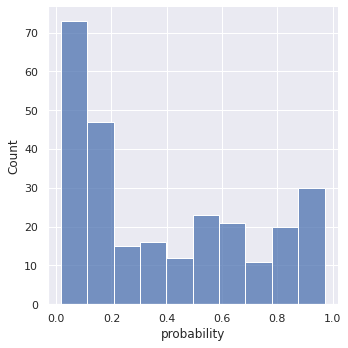

In [ ]:
sns.displot(test_II, x="probability", fill=True)

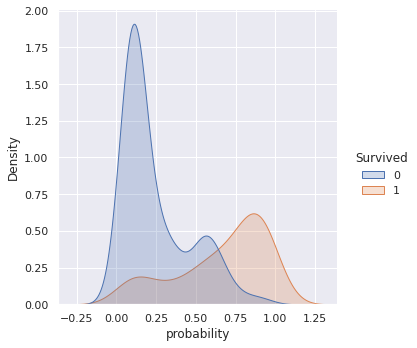

In [ ]:
sns.displot(test_II, x="probability", hue = 'Survived', kind="kde", fill=True)

Gini del modelo

In [ ]:
from sklearn.metrics import *

In [ ]:
def plot_roc_curve(y_true, y_score, filepath=None, line_width=2, width=12,
                   height=10, title=None, colors=("#FF0000", "#000000")):
    """
    Saves a ROC curve in a file or shows it on screen.
    :param y_true: actual values of the response (list|np.array)
    :param y_score: predicted scores (list|np.array)
    :param filepath: if given, the ROC curve is saved in the desired filepath. It should point to a png file in an
    existing directory. If not specified, the curve is only shown (str)
    :param line_width: number indicating line width (float)
    :param width: number indicating the width of saved plot (float)
    :param height: number indicating the height of saved plot (float)
    :param title: if given, title to add to the top side of the plot (str)
    :param colors: color specification for ROC curve and diagonal respectively (tuple of str)
    :return: None
    """
    fpr, tpr, _ = roc_curve(y_true=y_true, y_score=y_score)
    gini = auc(fpr, tpr) * 2 - 1

    sns.set_style("whitegrid")
    fig = plt.figure(figsize=(width, height))
    major_ticks = np.arange(0, 1.1, 0.1)
    minor_ticks = np.arange(0.05, 1, 0.1)
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xticks(major_ticks)
    ax.set_yticks(major_ticks)
    ax.set_xticks(minor_ticks, minor=True)
    ax.set_yticks(minor_ticks, minor=True)
    ax.grid(which="both", axis="both")
    ax.grid(which="minor", alpha=0.2)
    ax.grid(which="major", alpha=0.5)
    ax.tick_params(which="major", direction="out", length=5)
    plt.plot(fpr, tpr, color=colors[0], lw=line_width,
                   label="ROC curve (gini = {:.2f})".format(gini))
    plt.plot([0, 1], [0, 1], color=colors[1], lw=line_width, linestyle='--')
    plt.xlim([-0.001, 1.001])
    plt.ylim([-0.001, 1.001])
    plt.xlabel("False positive rate", fontsize=15)
    plt.ylabel("True positive rate", fontsize=15)
    if title:
        plt.title(title, fontsize=30, loc="left")
    plt.legend(loc="lower right", frameon=True, fontsize="large",
                     fancybox=True)
    plt.tight_layout()
    if filepath:
        plt.savefig(filepath, dpi=200)
        plt.close()
    else:
        plt.show()

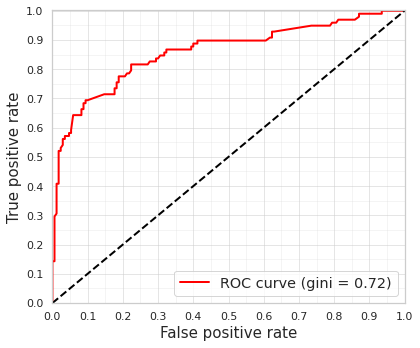

In [ ]:
plot_roc_curve(y_test, test_II.probability, width=6, height=5)

In [ ]:
# AUC

print('TRAIN AUC: %f' %(roc_auc_score(y_train, train_II.probability)))
print('TEST AUC: %f' %(roc_auc_score(y_test, test_II.probability)))


TRAIN AUC: 0.851724
TEST AUC: 0.859214


In [ ]:
# GINI

print('TRAIN GINI: %f' %(roc_auc_score(y_train, train_II.probability)*2-1))
print('TEST GINI: %f' %(roc_auc_score(y_test, test_II.probability)*2-1))


TRAIN GINI: 0.703447
TEST GINI: 0.718427


In [ ]:
# Tablas cruzadas

pd.crosstab(test_II.prediction, y_test, margins=True, margins_name="Total")

Survived,0,1,Total
prediction,,,
0,139,25,164
1,31,73,104
Total,170,98,268


In [ ]:
pd.crosstab(test_II.prediction, y_test, margins=True, margins_name="Total", normalize=True)

Survived,0,1,Total
prediction,,,
0,0.518657,0.093284,0.61194
1,0.115672,0.272388,0.38806
Total,0.634328,0.365672,1.00000


In [ ]:
# ACCURACY

print('TRAIN ACCURACY: %f' %(accuracy_score(y_train, train_II.prediction)))
print('TEST ACCURACY: %f' %(accuracy_score(y_test, test_II.prediction)))


TRAIN ACCURACY: 0.791332
TEST ACCURACY: 0.791045


In [ ]:
# PRECISION

print('TRAIN PRECISION: %f' %(precision_score(y_train, train_II.prediction)))
print('TEST PRECISION: %f' %(precision_score(y_test, test_II.prediction)))


TRAIN PRECISION: 0.745690
TEST PRECISION: 0.701923


In [ ]:
# RECALL

print('TRAIN RECALL: %f' %(recall_score(y_train, train_II.prediction)))
print('TEST RECALL: %f' %(recall_score(y_test, test_II.prediction)))


TRAIN RECALL: 0.709016
TEST RECALL: 0.744898


In [ ]:
# F1

print('TRAIN F1: %f' %(f1_score(y_train, train_II.prediction)))
print('TEST F1: %f' %(f1_score(y_test, test_II.prediction)))


TRAIN F1: 0.726891
TEST F1: 0.722772


In [ ]:
#Resumen de todas las métricas del modelo

metricsLogisitc = pd.DataFrame({'metric':['AUC','Gini','Accuracy','Precision','Recall','F1-score'],
                                'logistic_train':[roc_auc_score(y_train, train_II.probability),
                                        (roc_auc_score(y_train, train_II.probability)*2-1),
                                        accuracy_score(y_train, train_II.prediction),
                                        precision_score(y_train, train_II.prediction),
                                        recall_score(y_train, train_II.prediction),
                                        f1_score(y_train, train_II.prediction)],

                                'logistic_test':[roc_auc_score(y_test, test_II.probability),
                                        (roc_auc_score(y_test, test_II.probability)*2-1),
                                        accuracy_score(y_test, test_II.prediction),
                                        precision_score(y_test, test_II.prediction),
                                        recall_score(y_test, test_II.prediction),
                                        f1_score(y_test, test_II.prediction)]})

metricsLogisitc

,metric,logistic_train,logistic_test
0,AUC,0.851724,0.859214
1,Gini,0.703447,0.718427
2,Accuracy,0.791332,0.791045
3,Precision,0.745690,0.701923
4,Recall,0.709016,0.744898
5,F1-score,0.726891,0.722772


<h3>Análisis de Predicción</h3>

In [ ]:

from sklearn.preprocessing import KBinsDiscretizer

test_II['probability_rank'] = KBinsDiscretizer(n_bins = 6,
                                              encode = 'ordinal',
                                              strategy = "uniform").fit_transform(test_II[['probability']])


In [ ]:
aggregations = {'prediction':'count','probability':'max','Survived':'mean'}
res = test_II.groupby('probability_rank').agg(aggregations).reset_index()

In [ ]:

pddf1 = pd.DataFrame({'probability_rank':test_II.probability_rank,
                      'value':test_II.probability,
                     'type': 'probability_mean'})

pddf2 = pd.DataFrame({'probability_rank':test_II.probability_rank,
                      'value':test_II.Survived,
                     'type': 'Survived_rate'})

pddf = pddf1.append(pddf2)


<ipython-input-78-a7d24d67000d>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pddf = pddf1.append(pddf2)


<Axes: xlabel='probability_rank', ylabel='value'>

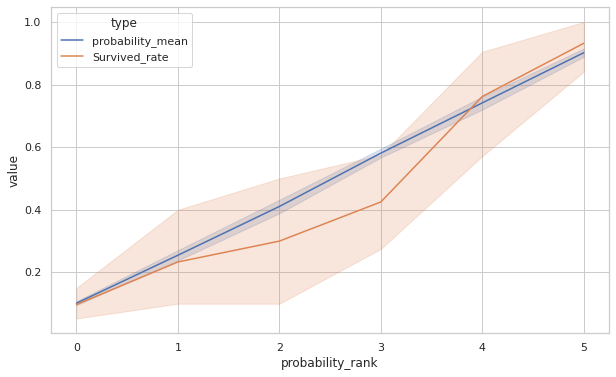

In [ ]:
# Ratio del evento por tramo dela variable numérica

sns.lineplot(data=pddf.reset_index(), x="probability_rank", y="value", hue="type", markers=True, dashes=False)


## Elastic Net

In [ ]:
#Variables para el modelo

numFeatures = ['Age_t','Fare_t','SibSp_t','Parch_t']
catFeatures = ['Pclass_num','Sex_num','Embarked_num']

X = data[numFeatures + catFeatures]
y = data.Survived


In [ ]:
# Muestreo de data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 123)

In [ ]:
# Modelo
from sklearn.linear_model import LogisticRegression

eltNet = LogisticRegression(penalty = 'elasticnet',
                            class_weight = {0:y_train.mean(), 1:1},
                            solver = 'saga',
                            C = 10000000,
                            l1_ratio = 0.5,
                            max_iter = 10000,
                            random_state = 123)

eltNet.fit(X_train, y_train)


LogisticRegression(C=10000000, class_weight={0: 0.391653290529695, 1: 1},
                   l1_ratio=0.5, max_iter=10000, penalty='elasticnet',
                   random_state=123, solver='saga')

In [ ]:
# Analizando los parámetros del modelo

paramElasticNet = pd.DataFrame({'feature': numFeatures + catFeatures,
                                'parámetro': eltNet.coef_.ravel(),
                                'metod': 'elastic_net'})
paramElasticNet

,feature,parámetro,metod
0,Age_t,-0.026383,elastic_net
1,Fare_t,0.016320,elastic_net
2,SibSp_t,-0.347499,elastic_net
3,Parch_t,0.108889,elastic_net
4,Pclass_num,0.334190,elastic_net
5,Sex_num,1.202953,elastic_net
6,Embarked_num,0.148644,elastic_net


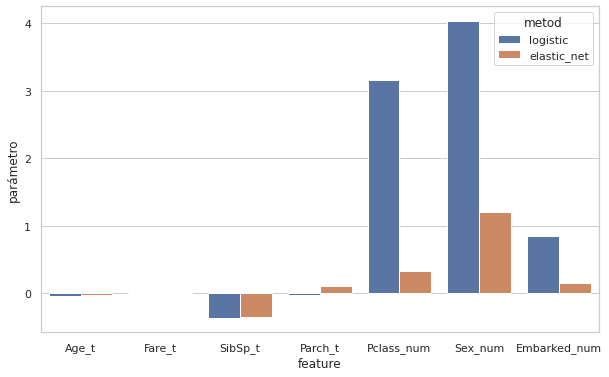

In [ ]:
resumen = paramLogistic.append(paramElasticNet)

sns.barplot(x='feature', y='parámetro', hue='metod', data=resumen)


In [ ]:
# Usando el modelo para predecir

X_train['probability'] = eltNet.predict_proba(X_train[numFeatures + catFeatures])[:,1]
X_test['probability']  = eltNet.predict_proba(X_test[numFeatures + catFeatures])[:,1]

X_train['prediction'] = eltNet.predict(X_train[numFeatures + catFeatures])
X_test['prediction']  = eltNet.predict(X_test[numFeatures + catFeatures])

X_train['Survived'] = y_train
X_test['Survived'] = y_test


In [ ]:
#Resumen de todas las métricas del modelo

metricsElasticNet = pd.DataFrame({'metric':['AUC','Gini','Accuracy','Precision','Recall','F1-score'],
                                'ElasticNet_train':[roc_auc_score(y_train, X_train.probability),
                                        (roc_auc_score(y_train, X_train.probability)*2-1),
                                        accuracy_score(y_train, X_train.prediction),
                                        precision_score(y_train, X_train.prediction),
                                        recall_score(y_train, X_train.prediction),
                                        f1_score(y_train, X_train.prediction)],

                                'ElasticNet_test':[roc_auc_score(y_test, X_test.probability),
                                        (roc_auc_score(y_test, X_test.probability)*2-1),
                                        accuracy_score(y_test, X_test.prediction),
                                        precision_score(y_test, X_test.prediction),
                                        recall_score(y_test, X_test.prediction),
                                        f1_score(y_test, X_test.prediction)]})

metricsElasticNet

,metric,ElasticNet_train,ElasticNet_test
0,AUC,0.822554,0.823049
1,Gini,0.645108,0.646098
2,Accuracy,0.661316,0.652985
3,Precision,0.541353,0.515337
4,Recall,0.885246,0.857143
5,F1-score,0.671851,0.643678


In [ ]:
pdRes = pd.merge(metricsLogisitc, metricsElasticNet, on = 'metric', how='left')
pdRes

,metric,logistic_train,logistic_test,ElasticNet_train,ElasticNet_test
0,AUC,0.853816,0.862185,0.822554,0.823049
1,Gini,0.707632,0.724370,0.645108,0.646098
2,Accuracy,0.791332,0.805970,0.661316,0.652985
3,Precision,0.761468,0.755556,0.541353,0.515337
4,Recall,0.680328,0.693878,0.885246,0.857143
5,F1-score,0.718615,0.723404,0.671851,0.643678


## Naive Bayes

In [ ]:
# Cargar Data
import pandas as pd
data = pd.read_csv("train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#Variables

numFeatures = ['Age','Fare','SibSp','Parch']
catFeatures = ['Pclass','Sex','Embarked']

In [ ]:
data[[x + '_t' for x in numFeatures]] = data[numFeatures].fillna(data[numFeatures].median())

In [ ]:
#Variables para el modelo

numFeatures = ['Age_t','Fare_t','SibSp_t','Parch_t']

X = data[numFeatures]
y = data.Survived

In [ ]:
# Muestreo de data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 123)

In [ ]:
X_train.corr()

,Age_t,Fare_t,SibSp_t,Parch_t
Age_t,1.000000,0.104797,-0.184710,-0.163742
Fare_t,0.104797,1.000000,0.167693,0.236887
SibSp_t,-0.184710,0.167693,1.000000,0.434061
Parch_t,-0.163742,0.236887,0.434061,1.000000


In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb = GaussianNB()
gnb = gnb.fit(X_train, y_train)


In [ ]:
gnb.predict_proba(X_train[numFeatures])

array([[0.68313158, 0.31686842],
       [0.69047955, 0.30952045],
       [0.72529459, 0.27470541],
       ...,
       [0.7237841 , 0.2762159 ],
       [0.71873977, 0.28126023],
       [0.7167673 , 0.2832327 ]])

In [ ]:
# Usando el modelo para predecir

X_train['probability'] = gnb.predict_proba(X_train[numFeatures])[:,1]
X_test['probability']  = gnb.predict_proba(X_test[numFeatures])[:,1]

X_train['prediction'] = gnb.predict(X_train[numFeatures])
X_test['prediction']  = gnb.predict(X_test[numFeatures])

X_train['Survived'] = y_train
X_test['Survived'] = y_test

In [ ]:
#Resumen de todas las métricas del modelo

metricsgnb = pd.DataFrame({'metric':['AUC','Gini','Accuracy','Precision','Recall','F1-score'],
                                'gnb_train':[roc_auc_score(y_train, X_train.probability),
                                        (roc_auc_score(y_train, X_train.probability)*2-1),
                                        accuracy_score(y_train, X_train.prediction),
                                        precision_score(y_train, X_train.prediction),
                                        recall_score(y_train, X_train.prediction),
                                        f1_score(y_train, X_train.prediction)],

                                'gnb_test':[roc_auc_score(y_test, X_test.probability),
                                        (roc_auc_score(y_test, X_test.probability)*2-1),
                                        accuracy_score(y_test, X_test.prediction),
                                        precision_score(y_test, X_test.prediction),
                                        recall_score(y_test, X_test.prediction),
                                        f1_score(y_test, X_test.prediction)]})

metricsgnb

,metric,gnb_train,gnb_test
0,AUC,0.674521,0.693097
1,Gini,0.349042,0.386194
2,Accuracy,0.685393,0.716418
3,Precision,0.744898,0.805556
4,Recall,0.299180,0.295918
5,F1-score,0.426901,0.432836


In [ ]:
pdRes = pd.merge(pdRes, metricsgnb, on = 'metric', how='left')
pdRes

,metric,logistic_train,logistic_test,ElasticNet_train,ElasticNet_test,gnb_train,gnb_test
0,AUC,0.853816,0.862185,0.761425,0.782833,0.674521,0.693097
1,Gini,0.707632,0.724370,0.522849,0.565666,0.349042,0.386194
2,Accuracy,0.791332,0.805970,0.566613,0.537313,0.685393,0.716418
3,Precision,0.761468,0.755556,0.472917,0.436893,0.744898,0.805556
4,Recall,0.680328,0.693878,0.930328,0.918367,0.299180,0.295918
5,F1-score,0.718615,0.723404,0.627072,0.592105,0.426901,0.432836


## Decision Tree

In [ ]:
data = pd.read_csv("train_titanic.csv")

In [ ]:
data[c] = data[c].replace(np.nan,'missing')


In [ ]:

numFeatures = ['Age','Fare','SibSp','Parch']
catFeatures = ['Pclass','Sex','Embarked']

for c in catFeatures:
  data[c] = data[c].replace(np.nan,'missing')

In [ ]:
data[[x + '_t' for x in numFeatures]] = data[numFeatures].fillna(data[numFeatures].median())


In [ ]:
# Target Encoding
from category_encoders import TargetEncoder
encoder = TargetEncoder()

data[[x + '_num' for x in catFeatures]] = encoder.fit_transform(data[catFeatures], data['Survived'])


/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:94: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:99: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)


In [ ]:
#Variables para el modelo

numFeatures = ['Age_t','Fare_t','SibSp_t','Parch_t']
catFeatures = ['Pclass_num','Sex_num','Embarked_num']

X = data[numFeatures + catFeatures]
y = data.Survived

In [ ]:
# Muestreo de data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 123)

In [ ]:
# Configuramos el modelo

from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)



In [ ]:
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

dot_data = export_graphviz(dtree,
                           feature_names = numFeatures + catFeatures,
                           filled = True,
                           rounded = True,
                           special_characters = True)

graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')
print(graph)


In [ ]:
# Configuramos el modelo

from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(max_depth = 3,
                               min_samples_leaf = 0.03,
                               min_samples_split = 0.1,
                               #class_weight = {andom_state = 1230:y_train.mean(),1:1},
                               r)
dtree = dtree.fit(X_train, y_train)

dtree

DecisionTreeClassifier(max_depth=3, min_samples_leaf=0.03,
                       min_samples_split=0.1, random_state=123)

In [ ]:
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

dot_data = export_graphviz(dtree,
                           feature_names = numFeatures + catFeatures,
                           filled = True,
                           rounded = True,
                           special_characters = True)

graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')
print(graph)


In [ ]:
# Usando el modelo para predecir

X_train['probability'] = dtree.predict_proba(X_train[numFeatures + catFeatures])[:,1]
X_test['probability']  = dtree.predict_proba(X_test[numFeatures + catFeatures])[:,1]

X_train['prediction'] = dtree.predict(X_train[numFeatures + catFeatures])
X_test['prediction']  = dtree.predict(X_test[numFeatures + catFeatures])

X_train['Survived'] = y_train
X_test['Survived'] = y_test

In [ ]:
#Resumen de todas las métricas del modelo

metricsDtree = pd.DataFrame({'metric':['AUC','Gini','Accuracy','Precision','Recall','F1-score'],
                                'dTree_train':[roc_auc_score(y_train, X_train.probability),
                                        (roc_auc_score(y_train, X_train.probability)*2-1),
                                        accuracy_score(y_train, X_train.prediction),
                                        precision_score(y_train, X_train.prediction),
                                        recall_score(y_train, X_train.prediction),
                                        f1_score(y_train, X_train.prediction)],

                                'dTree_test':[roc_auc_score(y_test, X_test.probability),
                                        (roc_auc_score(y_test, X_test.probability)*2-1),
                                        accuracy_score(y_test, X_test.prediction),
                                        precision_score(y_test, X_test.prediction),
                                        recall_score(y_test, X_test.prediction),
                                        f1_score(y_test, X_test.prediction)]})

metricsDtree

In [ ]:
pd.merge(metricsLogisitc, metricsDtree, on = 'metric', how='left')

### Gracias por completar este laboratorio!

---

